# DenseNet

## LeNet

얀 르쿤(Yann LeCun) 연구팀은 기존 신경망의 문제점을 해결하기 위해 local receptive field, shared weights, sub-sampling 개념을 고려해 합성곱 신경망(convolutional neural network, CNN)을 개발하였다. 그리고 1990년 처음으로 CNN 개념이 반영된 LeNet-1을 발표했다. LeNet-5는 1998년 LeCun 연구팀의 논문 Gradient-based learning applied to document recognition에 있는 신경망 구조이다. LeNet은 손으로 적힌 우편 번호를 전통적인 기법으로 입력 데이터의 제한된 특징만 추출하는 hand-designed feature extractor보다 효율적으로 인식하기 위해 만들어진 모형이다. Fully-connected multi layer는 너무 많은 매개변수로 학습하기 힘들고, 손글씨는 사람의 글쓰기 스타일에 따라 distortion과 shift가 발생한다. 마지막으로 입력 값의 topology가 무시된다. 우편 번호 이미지는 2D 구조를 갖고 있어 인접한 픽셀들이 공간적으로 상관관계가 있다. 그리고 Full-connected multi layer는 인접한 변수들을 단순히 1차원 배열로 학습하므로 공간적인 정보를 이용하지 못한다.

CNN은 shift, scale, distortion의 불변성을 얻기 위해 연구되었다. CNN은 은닉층의 수용 영역(receptive field)을 local로 제한함으로 local feature를 추출한다. 하나의 레이어는 이전 레이어의 제한된 지역에 위치한 유닛의 집합을 입력으로 취한다. 수용 영역을 이용하여 코너(conner), 경계(edge), 엔드포인트(end-point)와 같은 특징을 추출할 수 있게 된다. 추출된 특징들은 고차원의 특징을 검출하기 위해 다음 레이어에서 결합된다. 이를 통해 shift, distorition이 발생하더라도 특징을 나타내는 배열이 수용 영역에 검출되면 해당 특징을 반영한 특징맵(feature map)을 만들 수 있다. 또한, 수용 영역을 이용하면 파라미터의 수를 줄일 수 있다. 

CNN에서 receptive field는 각 단계의 입력 이미지에 대해 하나의 필터가 커버할 수 있는 이미지 영역의 일부를 뜻한다. receptive field는 CNN 계층이 깊어질수록 선형적(linearly)으로 증가하고, atrous convolutions를 쌓을때는 기하급수적(exponentially)으로 증가한다. 아래의 그림에서 왼쪽 검붉은 영역이 receptive field이다. 그림에서 살펴볼 수 있듯이 receptive field는 layer를 거치게 되면서 채널(channel) 영역으로는 길어지지만, 공간적(spatial)으로는 작아짐을 알 수 있다. 그 다음 필터는 이 receptive field를 보게 되고, 단계를 거칠수록 각각의 필터가 볼 수 있는 receptive field을 확장시킴으로써 구조적으로 효율을 높인다.

<div>
    <img src="https://unerue.synology.me/course/computer-vision/receptive_field.jpg" style="height: 240px;" />
</div>

또한, CNN은 가중치를 강제로 복제함으로써 자동으로 shift 불변성을 얻는다. 특징 맵에 있는 유닛은 동일한 가중치와 편향을 공유한다. 공유된 가중치 집합을 필터를 이용하여 입력에서 모든 위치에서 동일한 특징을 추출한다. 예를 들어, $5 \times 5$ 커널은 해당 사이즈와 설정된 스트라이드(stride)에 맞춰 특징맵을 돌아다니며 연산하지만, $5 \times 5$의 가중치와 1개의 편향만 역전파(back propagation)로 학습한다. 가중치를 공유하면 학습 파라미터가 느는 것이 아니라 커널을 총 몇개로 설정하는가에 따라 출력된 특징맵의 수와 학습해야하는 파라미터만 늘게 된다. 이 기법을 사용하면 요구되는 연산량(capacity)를 줄이고 학습할 파라미터를 줄이면서 과적합을 방지한다. 실제 LeNet은 340,908 연결(connection)이 존재하지만 60,000개의 학습가능한 파라미터(trainable parameters)만 존재한다. 이 덕분에 CNN은 입력의 왜곡과 변환에 대해 매우 강건하다.

Sub-sampling은 현재에는 풀링 계층으로 불린다. LeNet은 평균 풀링을 사용한다. 한번 특징이 검출디면 위치 정보의 중요성이 떨어진다. 입력 이미지가 7이라면 좌측 상단에 수평적인 엔드포인트, 우측 상단에 코너, 이미지 아래 부분에 수직전인 엔드포인트를 포함한다. 이러한 특징의 위치 정보는 패턴을 식별하는 것과 무관할 뿐만 아니라 입력값에 따라 특징이 나타나는 위치가 다를 가능성이 높기 때문에 잠재적으로 유해하다.

특징맵으로 인코딩(encoding)되는 특징들의 위치에 대한 정확도를 감소시키기 위한 가장 간단한 방법은 특징맵의 해상도를 감소하는 것이다. sub-sampling layer에서 local average와 sub-sampling을 수행하여 특징맵의 해상도를 감소시키고 distortion과 shift에 대한 민감도를 감소할 수 있다. 그리고 위치 정보를 소실시키면서 생기는 손실은 특징맵의 크기가 작아질수록 더 많은 fiter를 사용하여 다양한 특징을 추출해 상호보완할 수 있도록 한다. 

<div>
    <img src="https://unerue.synology.me/course/computer-vision/lenet-5.png" style="height: 240px;" />
</div>

입력 이미지는 $32 \times 32$인데 실제 이미지 크기는 $28 \times 28$이다. 실제 이미지보다 크기가 큰 이유는 수용 영역의 중앙 부분에 코너 또는 경계와 같은 특징들이 있기 때문에 현대의 패딩(padding)과 같은 기법이라 볼 수 있다.

[참고자료1](https://deep-learning-study.tistory.com/368)
[참고자료2](https://pgr21.com/freedom/84949)
[참고자료3](https://oi.readthedocs.io/en/latest/computer_vision/cnn/lenet.html)

### 합성곱 신경망

기존 신경망은 완전연결(fully connected, 전결합)이라고 모든 노드들이 연결되어있다. 완전연결계층은 인접하는 계층의 뉴런이 모두 연결되고 출력의 수를 임의로 정할 수 있다. FC의 단점은 데이터의 형상이 무시된다. 입력 데이터가 이미지읜 경우, 이미지는 통상 가로, 세로, 채널(색상)으로 구성된 3차원 데이터이다. 하지만 완전계층에 입력할때 3차원 데이터를 평평한 1차원으로 평탄화해줘야한다. 이미지는 공간적 정보가 담겨져있으며 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나 RGB 각 채널은 서로 밀접하게 연결되어 있으나 완전연결 계층은 이러한 형상을 무시하고 모든 입력 데이트를 동등한 뉴력(같은 차원의 뉴련)으로 취급하기 때문에 정보를 살릴 수 없다. CNN은 데이터의 형상을 유지하기 다음 계층 또한 3차원 데이터로 전달하기 때문에 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있다. CNN은 입출력 데이터를 특징맵(feature map)이라 한다.

2019년 ImageNet-trained CNNs are biased towards texture; increasing shape bias improves accuracy and robustness 논문에서 CNN은 질감(texture)에 영향을 더 많이 받는다라는 주장이 있다.

<div>
    <img src="https://unerue.synology.me/course/computer-vision/texture.png" style="height: 280px;" />
</div>

<div>
    <img src="https://unerue.synology.me/course/computer-vision/proof.png" style="height: 240px;" />
</div>

CNN은 이미지 처리에서 말하는 필터 연산에 해당한다. 

<div>
    <img src="https://unerue.synology.me/course/computer-vision/cnn.gif" style="height: 360px;" />
</div>

그림과 같이 합성곱 연산은 입력 데이터에 필터를 적용한다. 무헌에 따라 필터를 커널이라고도 칭한다. 합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용한다. 입력과 필터에 대응하는 원소끼리 곱한 후 그 총합을 구한다. 이 계싼을 단일 곱센-누산(fused multiply-add, FMA)라고 한다. 그 결과를 출력의 해당 장소에 저장한다. 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성된다. 그 다음 편향을 더해준다. 3차원의 합성곱 연산은 3차원 데이터와 3차원 필터를 사용하고 모두 더해서 2차원의 데이터로 표현한다. 

#### 스트라이드

필터를 적용하는 위치의 간격을 스트라이드(stride)라고 한다. 스트라이드가 1이면 한 칸씩 이동하고 2로하면 윈도우가 두 칸씩 이동한다. 

#### 패딩

합성곱 연산을 수행하기 전 입력 데이터 주변을 특정 값(예컨대 0)으로 채우기도 한다. 이를 패딩(padding)이라 한다. 패딩은 주로 출력 크기를 조정할 목적으로 사용한다. 입력 데이터의 공간적 크기를 고정한 채로 다음 계층에 전달할 수 있다. 

$$
OH=\frac{H+2P-FH}{S}+1\\
OW=\frac{W+2P-FW}{S}+1\\
$$


In [1]:
import numpy as np


def img2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = int((H + 2*pad - filter_h) / stride + 1)
    out_w = int((W + 2*pad - filter_w) / stride + 1)

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    print(N, C, filter_h, filter_w, out_h, out_w)
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


class ConvolutionalNeuralNetworks:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2 * self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)

        col = img2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T 
        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

In [2]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torchinfo import summary


class LeNet5(nn.Module):
    def __init__(self, num_classes: int = 10):
        super().__init__()
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=num_classes),
        )

    def forward(self, x: Tensor):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

    
model = LeNet5()
print(summary(model, input_size=(1, 1, 32, 32)))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet5                                   --                        --
├─Sequential: 1-1                        [1, 120, 1, 1]            --
│    └─Conv2d: 2-1                       [1, 6, 28, 28]            156
│    └─Tanh: 2-2                         [1, 6, 28, 28]            --
│    └─AvgPool2d: 2-3                    [1, 6, 14, 14]            --
│    └─Conv2d: 2-4                       [1, 16, 10, 10]           2,416
│    └─Tanh: 2-5                         [1, 16, 10, 10]           --
│    └─AvgPool2d: 2-6                    [1, 16, 5, 5]             --
│    └─Conv2d: 2-7                       [1, 120, 1, 1]            48,120
│    └─Tanh: 2-8                         [1, 120, 1, 1]            --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Linear: 2-9                       [1, 84]                   10,164
│    └─Tanh: 2-10                        [1, 84]                   --
│  

## AlexNet

AlexNet은 Alex Khrizevsky의 이름은 딴것으로 2012년에 개최한 ImageNet Large Scale Visual Recognition Challenge(ILSVRC) 대회에서 우승을 차지한 딥러닝 기반 이미지 분류기(image classifier, image classification)이다. AlexNet이 지닌 가장 큰 기여는 딥러닝은 이론만 장황하고 성능은 형편없는 기술로 여겨졌는데, 당시 성능이 제일 좋았던 것은 HoG(histograms of oriented gradients) + SVM(support vector machines)으로 전통적인 방법론보다 컴퓨터 비전 분야에서 딥러닝이 최고의 성능을 낼 수 있다고 증명했다. AlexNet은 1998년에 개발된 LeNet과 비슷하지만, 거의 15년이 지난 지금 성능이 향상된 이유는 하드웨어 성능 상승과 GPU 병렬처리에 있다. AlexNet 등장으로 딥러닝 용어가 확산되고 머신러닝의 기술적 문제들 대부분 해결한 제프리 힌튼(Geoffrey E. Hinton) 연구팀이다.

### 풀링 계층

맥스 풀링(max pooling)은 가로세로 방향의 공간을 줄이는 연산이다. 최대 풀링은 윈도우 크기에 비례하여 스트라이드로 연산하고 해당 값을 최대값을 받는다. 평균 값ㅇ르 받으면 평균 풀링을 사용한다. 풀링 계층은 학습해야할 매개변수가 없으며, 채널의 수가 변하지 않는다. 또한, 입력의 변화에 영향을 적게 받는다 즉, 강건하다. 

In [ ]:
class MaxPooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = img2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

### 활성화 함수: ReLU

ReLU(rec) 경사하강법으로 최적화하기 좋고 일반화(generalization)에 좋고 vanishing graident problem을 피할 가능성이 있다. sigmoid나 tahn을 미분하면 범위가 $[0, 1/4]$ 더 미분하면 할 수록 계속 0에 가까워지는 문제가 있다.

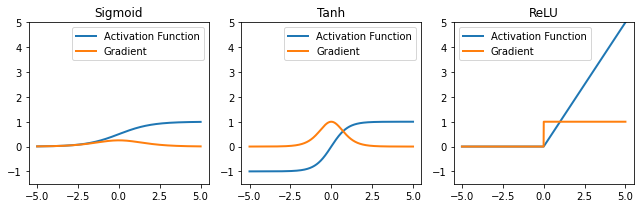

In [15]:
import os
import json
import math
import numpy as np
from typing import Callable, List, Tuple

import matplotlib.pyplot as plt

import torch
from torch import nn, Tensor, optim
import torch.nn.functional as F


class ActivationFunction(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {'name': self.name}


class Sigmoid(ActivationFunction):
    def forward(self, x: Tensor) -> Tensor:
        return 1 / (1 + torch.exp(-x))
    

class Tanh(ActivationFunction):
    def forward(self, x: Tensor) -> Tensor:
        x_exp, neg_x_exp = torch.exp(x), torch.exp(-x)
        return (x_exp - neg_x_exp) / (x_exp + neg_x_exp)


class ReLU(ActivationFunction):  
    def forward(self, x: Tensor) -> Tensor:
        return x * (x > 0).float()

    
act_fn_by_name = {
    'sigmoid': Sigmoid,
    'tanh': Tanh,
    'relu': ReLU,
}


def get_grads(act_fn: nn.Module, x: Tensor) -> Tensor:
    x = x.clone().requires_grad_()
    out = act_fn(x)
    out.sum().backward()
    return x.grad


def vis_act_fn(act_fn: Callable, ax: List, x: Tensor) -> None:
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    
    ax.plot(x, y, linewidth=2, label='Activation Function')
    ax.plot(x, y_grads, linewidth=2, label='Gradient')
    ax.set_title(act_fn.name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())


act_fns = [act_fn() for act_fn in act_fn_by_name.values()]
x = torch.linspace(-5, 5, 1000)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
for i, act_fn in enumerate(act_fns):
    vis_act_fn(act_fn, axes.flat[i], x)

fig.subplots_adjust(hspace=0.3)
fig.tight_layout()
plt.show()

### Local Response Normalization

차후 알게될 배치 정규화(batch normalization)으로 지금은 잘 사용하지 않는 정규화 방법이다. CNN의 커널이 이미지르 스캔할 때 특정 픽셀값이 다른 픽셀에 비해 지나치게 높은 값ㅇ르 가지고 있어 주변에 큰 영향력을 끼치는 것을 억제시키는 일반화 방법 중 하나이다. 이는 tahn이나 sigmoid처럼 최대값이 존재하는 것이 아닌 ReLU와 같은 활성화 함수를 지나칠 때 큰 값이 통과되는 문제의 부작용을 줄이기 위해 사용했다. 

$$b_{x,y}^{i}=a_{x,y}^{i}/\bigg(k+\alpha \sum_{j=\max{0,i-n/2}}^{\min{N-1,i+n/2}}(a_{x,y}^{i})^{2}\bigg)^\beta$$

<div>
    <img src="https://unerue.synology.me/course/computer-vision/alexnet.png" style="height: 360px;" />
</div>

In [28]:
from typing import Any

import torch
import torch.nn as nn
from torchinfo import summary


class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.5) -> None:
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.feature_extractor(x)
        x = x.view(-1, 256 * 6 * 6)
        x = self.classifier(x)
        return x

    
model = AlexNet()
print(summary(model, input_size=(1, 3, 224, 224)))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  --                        --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 96, 55, 55]           34,944
│    └─ReLU: 2-2                         [1, 96, 55, 55]           --
│    └─LocalResponseNorm: 2-3            [1, 96, 55, 55]           --
│    └─MaxPool2d: 2-4                    [1, 96, 27, 27]           --
│    └─Conv2d: 2-5                       [1, 256, 27, 27]          614,656
│    └─ReLU: 2-6                         [1, 256, 27, 27]          --
│    └─LocalResponseNorm: 2-7            [1, 256, 27, 27]          --
│    └─MaxPool2d: 2-8                    [1, 256, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 384, 13, 13]          885,120
│    └─ReLU: 2-10                        [1, 384, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 384, 13, 13]          1,32

#### AdaptiveAvgPool2d

여러 입력 평면으로 구성된 입력 신호에 2D 적응형 평균 풀링을 적용합니다. 출력은 모든 입력 크기에 대해 H x W 크기입니다. 출력 기능의 수는 입력 평면의 수와 같습니다.

output_size – H x W 형식의 이미지 대상 출력 크기입니다. 정사각형 이미지 H x H의 경우 튜플(H, W) 또는 단일 H가 될 수 있습니다. H 및 W는 int 또는 None이 될 수 있음을 의미합니다. 크기는 입력의 크기와 동일하다.

## VGG

VGGNet은 2014년 옥스포드 대학의 연구팀 VGG에 의해 개발된 모형으로 ImageNet 대회에서 준우승을 한 모형이다. VGG는 AlexNet과 유사하지만 병렬적 구조로 이뤄지진 않았다. 현재를 기준으로 이미지 분류기의 역사를 살펴보았을 때 VGGNet부터 시작해서 네트워크의 깊이가 확 깊어졌다. 2012년, 2013년 우승 모델들은 8개의 계층으로 구성되었었다. 반면 2014년의 VGG19는 19층으로 구성되었고, 또한 GoogLeNet은 22층으로 구성되었다. 그리고 앞으로 배울 2015년에 이르러서는 152개의 층으로 구성된 ResNet이 제안되었다. 네크워크가 깊어질 수록 성능이 좋아졌음을 위 그림을 통해 확인할 수 있다. VGGNet은 사용하기 쉬운 구조와 좋은 성능 덕분에 그 대회에서 우승을 거둔 매우 복잡한 GoogLeNet보다 더 많은 인기를 얻었다. 

VGG는 Karen Simonyan과 Andrew Zisserman에 의해 2015 ICLR에 게재된 Very deep convolutional networks for large-scale image recognition 논문이다. 저자들의 네트워크의 깊이를 깊게 만드는 것이 성능에 어떤 영향을 미치는지를 확인하고자 했다. VGG 연구팀은 깊이의 영향만을 최대한 확인하고자 CNN의 커널 사이즈를 가장 작은 $3 \times 3$으로 고정했다. 

VGG 연구팀은 6개의 구조(A, A-LRN, B, C, D, E)를 만들어 네트워크의 깊이에 따른 성능 변화를 비교하였다. 저자들은 AlexNet과 VGG-F, VGG-M, VGG-S에서 사용되던 Local Response Normalization(LRN)이 A 구조와 A-LRN 구조의 성능을 비교함으로 성능 향상에 별로 효과가 없다고 실험을 통해 확인했다. 따라서 더 깊은 B, C, D, E 구조에는 LRN을 적용하지 않았다. 또한, 그들은 깊이가 11층, 13층, 16층, 19층으로 깊어지면서 분류기의 오류가 감소하는 것을 관찰했다. 즉, 깊어질수록 성능이 좋아진다는 것이었다. 

VGGNet은 왜 Conv 필터의 사이즈가 $3 \times 3$으로 고정한 이유는 특징맵이 필터를 거칠 수록 특징맵의 크기는 줄어들기 때문이다. 그래서 필터의 사이즈가 클 수록 이미지가 줄어드는 것이 빨라지고 레이어를 깊게 만들 수 없을 것이다. 따라서 필터를 가장 작은 사이즈인 $3 \times 3$으로 설정하여 레이어를 거치더라도 큰 필터보다 적게 줄어 상대적으로 레이어가 깊은 모델을 만들 수 있어 사용했을 것이라 생각한다. 또한, 파라미터의 개수가 줄어드는 효과와 ReLU가 활성화 함수로 들어갈 수 있는 곳이 많아진다는 장점이 있어 사용했다고 한다.

VGGNet의 구조를 깊이 들여다보기에 앞서 먼저 집고 넘어가야할 것이 있다. 그것은 바로 $3 \times 3$ 필터로 두 차례 컨볼루션을 하는 것과 $5 \times 5$ 필터로 한 번 컨볼루션을 하는 것이 결과적으로 동일한 사이즈의 특성맵을 산출한다. $3 \times 3$ 필터로 세 차례 컨볼루션 하는 것은 $7 \times 7$ 필터로 한 번 컨볼루션 하는 것과 대응된다.

<div>
    <span>
        <img src="https://unerue.synology.me/course/computer-vision/vgg1.png" style="height: 320px;" />
        <img src="https://unerue.synology.me/course/computer-vision/vgg2.png" style="height: 320px;" />
    </span>
</div>
 

먼저 필터의 사이즈를 작게 하므로서 얻는 장점으로는 $7 \times 7$의 레이어에 $5 \times 5$의 필터를 적용하면 49개의 파라미터를 가지며 $3 \times 3$의  특징맵이 만들어진다. 하지만 $3 \times 3$의 필터를 3번 적용시키면 $5 \times 5$의 필터와 동일한 효과를 볼 수 있을 뿐더러 파라미터의 개수도 더 적은 27개가  생기게 된다. 같은 효과를 가지지만 더 적은 파라미터를 나온다면 학습의 효율성이 좋아질 것이다. 그렇기 때문에 CNN 필터의 사이즈를 $3 \times 3$으로 설정한 것이다(파라미터의 개수가 줄어들 수록 정규화를 할때 이점을 얻을 수 있다고 한다). 그래서 VGG16의 모든 필터는  $3 \times 3$, stride = 1으로 설정되어 있다. ReLU 함수를 적용시켜 비선형성을 가지게 하여 CNN에서 레이어를 쌓는다는 의미를 가지게 하는데 이 함수가 많아지면 비선형성이 적용되어 레이어의 깊이가 깊어질 수록 학습의 효과를 증폭시키게 되는 것이다.

<div>
    <img src="https://unerue.synology.me/course/computer-vision/vgg3.png" style="height: 480px;" />
</div>
 
[참고자료1](https://daechu.tistory.com/10)

In [ ]:
from typing import Union, List, Dict, Any, cast

import torch
import torch.nn as nn


class VGG(nn.Module):
    def __init__(
        self, features: nn.Module, num_classes: int = 1000, init_weights: bool = True, dropout: float = 0.5
    ) -> None:
        super().__init__()
        self.features = features
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            for m in self.modules():
                if isinstance(m, nn.Conv2d):
                    nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
                    if m.bias is not None:
                        nn.init.constant_(m.bias, 0)
                elif isinstance(m, nn.BatchNorm2d):
                    nn.init.constant_(m.weight, 1)
                    nn.init.constant_(m.bias, 0)
                elif isinstance(m, nn.Linear):
                    nn.init.normal_(m.weight, 0, 0.01)
                    nn.init.constant_(m.bias, 0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


def make_layers(cfg: List[Union[str, int]], batch_norm: bool = False) -> nn.Sequential:
    layers: List[nn.Module] = []
    in_channels = 3
    for v in cfg:
        if v == "M":
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            v = cast(int, v)
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)


cfgs: Dict[str, List[Union[str, int]]] = {
    "A": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "B": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "D": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "E": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"],
}


def _vgg(arch: str, cfg: str, batch_norm: bool, pretrained: bool, progress: bool, **kwargs: Any) -> VGG:
    if pretrained:
        kwargs["init_weights"] = False
    model = VGG(make_layers(cfgs[cfg], batch_norm=batch_norm), **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch], progress=progress)
        model.load_state_dict(state_dict)
    return model


def vgg11(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> VGG:
    r"""VGG 11-layer model (configuration "A") from
    `"Very Deep Convolutional Networks For Large-Scale Image Recognition" <https://arxiv.org/pdf/1409.1556.pdf>`_.
    The required minimum input size of the model is 32x32.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _vgg("vgg11", "A", False, pretrained, progress, **kwargs)


def vgg13(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> VGG:
    r"""VGG 13-layer model (configuration "B")
    `"Very Deep Convolutional Networks For Large-Scale Image Recognition" <https://arxiv.org/pdf/1409.1556.pdf>`_.
    The required minimum input size of the model is 32x32.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _vgg("vgg13", "B", False, pretrained, progress, **kwargs)


def vgg16(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> VGG:
    r"""VGG 16-layer model (configuration "D")
    `"Very Deep Convolutional Networks For Large-Scale Image Recognition" <https://arxiv.org/pdf/1409.1556.pdf>`_.
    The required minimum input size of the model is 32x32.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _vgg("vgg16", "D", False, pretrained, progress, **kwargs)


def vgg19(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> VGG:
    r"""VGG 19-layer model (configuration "E")
    `"Very Deep Convolutional Networks For Large-Scale Image Recognition" <https://arxiv.org/pdf/1409.1556.pdf>`_.
    The required minimum input size of the model is 32x32.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _vgg("vgg19", "E", False, pretrained, progress, **kwargs)

## Network in Network

2014년에 ICLR에 발표된 Network In Network 논문이다. 저자들은 수용영역안에서 local patches에 대한 모델 차별성을 높이기 위해 Network In Network 모델 구조를 제시했다. 전통적인 CNN 모형은 비선형 활성화 함수와 함께 사용되는 선형 필터를 사용한다. 반면, Network In Network는 전통적 CNN 모형보다 수용영역 안에 데이터를 더 복잡하게 추상화할 수 있는 micro neural network를 사용한다.

Micro neural network의 모델링 성능을 더욱 향상시키기 위해서 global average pooling도 제시한다. global average pooling를 사용하면 모델에 대한 해석이 쉬워질 뿐만 아니라 classification에 필요한 fully-connected layer를 사용하게 되면서 발생하게 될 over-fitting에도 영향을 덜 받을 수 있다.

일반적으로 사용되는 CNN의 conv filter는 데이터 패치(data patch)에 대한 generalized linear model(GLM)이다. 저자는 이 glm의 추상화 수준이 낮다고 주장하며, glm을 더 효과있는 비선형 함수 approximator로 대체한다면 model의 추상화 성능을 더욱 높일 것이라고 말한다. GLM은 선형적으로 분리될 수 있는 잠재공간 하에서만 좋은 성능을 보장할 수 있다. 이는 glm을 사용하는 전통적인 cnn이 암시적으로 잠재공간이 선형적으로 분리가능하다는 가정을 하게 만든다.(일반적으로 잠재공간은 비선형적인데도 불구하고!)

따라서, NIN에서는 glm을 비선형 함수 추정기인 micro network로 대체한다. 본 논문에서는 glm을 보편적인 함수추정기 이면서, 역전파로 훈련이 가능한, Multilayer Perceptron으로 정했다.
(함수추정기라고 번역한 것은 논문에서 fuction approximator라고 표현한 것을 직역한 것인데, 무슨 뜻인지 잘 모르겠지만 아마 일반적으로 tf,torch에서 사용되는 dense,Linear와 같이, input에 대해서 output을 반환하는 역할을 하는 부분인 것 같다.)

(a)는 선형 cnn layer이고, (b)는 Multilayer Perceptron이 사용된 layer이다. (앞으로 conv + Multilayer Perceptron은 mlpconv layer라고 지칭한다.)

(b)는 비선형 활성화 함수와 함께 여러개의 fully connected layer로 이루어진 Multilayer Perceptron이 입력 local patch를 output feature vector와 매치시키는 모습을 보여준다. Multilayer Perceptron이 여러개의 fully connected layer이루어져 있기 때문에 모든 local receptive field는 공유된다!
mlpconv layer를 여러겹 쌓은 것이 바로 NIN이다.

NIN에서는 classification을 위해 fully connected layer 대신 global average pooling을 사용한다. global average pooling은 마지막 mlpconv layer에서 나온 feature map의 공간 별 평균을 통해 class에 대한 confidence를 출력할 수 있게한다.

global average pooling을 사용하면 좀 더 의미있는 해석이 가능하고, dropout에 의존적이고 over-fitting의 가능성이 높은 fully connected layer에 비해서, global average pooling자체가 구조적으로 regularizer의 역할을 하기 때문에 전반적으로 overfitting을 방지하는 효과를 얻을 수 있다!(fully connected layer는 파라미터 수가 폭발적으로 증가하는 한편, global average pooling은 파라미터 수가 늘어나지 않기 때문에 over-fitting 되지 않는다.)

Convolutional Neural Networks
이 Sector에서는 Introduction에서 언급한 것처럼 전통적 Convolutional Neural Networks에 단점에 대해 언급한다.
그래서 중요하다고 생각되는 부분만 요약하고 넘어가고자 한다.

전통적 Convolutional Neural Networks는 선형적으로 분리가능한 상황에서 효과적이지만, 좋은 추상화는 대부분 input에 대해 비선형적이다. 이 때 Convolutional Neural Networks는 비선형 잠재공간을 학습하기 위해서 무리하게 되는데 이는 학습에 좋지 않은 영향을 미친다. 따라서 저자는 저차원의 결합으로 더 나은 고차원의 feature를 만드는 것보다 고차원으로 결합하기전에 각 local patch(저차원)에서 더 나은 추상화를 하는 것이 유리하다고 주장한다.

(중략,,)

이전연구에서도 micro network를 슬라이딩하는 것이 제안되었지만, 특정 task에 특화된 것이었다. NIN은 보다 일반적인 task로서 제안되었다.

Network In Network
MLPconv Layers
잠재공간에 대한 사전분포가 없을 때는 보편적인 함수 추정기를 사용하는 것이 바람직하다. 보편적인 함수 추정기로는 RBF와 MLP가 잘알려져있다.
Micro Neural networks로 이 논문에서는 MLPconv Layers를 채택했다. 2가지 이유가 있다.

1번째 이유

Multilayer Perceptron는 역전파로 훈련된Convolutional Neural Networks와 양립가능하다.

2번째 이유

다층 퍼셉트론은 feature 재사용 정신과 일치하는 심층 모델 그 자체일 수 있다.

1번째 이유가 중요해보인다~!

아래는 mlpconv layer의 계산 과정이다.

relu를 사용한 mlp conv layer의 계산식이다.

여기서 Equation 2가 CCCP(cascaded cross channel parametric pooling)와 같다는 점이 중요하다!

일반적인 pooling은 각 feature map에서 수행되지만 CCCP는 feature map을 가로질러서(Cross) pooling을 한다. 따라서 여러개의 채널 차원을 원하는 채널 수로 줄일 수 있고 이는, 차원을 감소시키는 효과를 가진다.


다시 본론으로 돌아와서, 이 CCCP는 1X1 convolution kernel과 같다. 즉, 논문에서 비선형적인 잠재공간을 더 추상화할 수 있게 Micro Neural networks을 사용했고, 이것을 Mlpconv layer로 정했는데 이건 CCCP와 같다. CCCP는 또한 1X1 convolution kernel와 같은 것이다.

이렇게 유도된 1X1 convolution는 channel reduction의 효과로 인해 훗날 GoogLeNet 및 여러 논문에서 사용된다.

1X1 Convolution kernel
논문에서는 따로 이 section은 없지만, 이참에 1X1 Convolution kernel 대한 이해도 있으면 좋을 것 같아서 해당 kernel에 대해 잘 설명해놓은 링크를 첨부한다.

https://hwiyong.tistory.com/45

Global Average Pooling
일반적으로 cnn을 사용하는 classifcation task에서는 마지막 conv층을 지난 feature map이 fully-connected layer를 거친 후 softmax layer을 통해 결과값을 제시한다.

그러나, fully-connected layer는 over-fitting 되기 쉽고, 전반적인 network의 일반화 성능에 좋지 않은 영향을 미친다.
classifcation task에서 fully-connected layer가 사용된 모델의 일반화 성능을 개선하기 위해 Dropout이 사용되곤 하는데, 본 논문에서는 global average pooling이라는 새로운 방법을 제시했다.


global average pooling은 위 그림에서 나타난 것처럼 각 feature map의 평균을 계산하는 것이다.

feature map에 fully-connected layer를 사용하게 되면 모든 feature map의 정보가 연결되기 때문에 각 class가 어떤 이유로 선택되었는지 알기가 어렵다. 하지만 global average pooling는 conv층을 통과한 각각의 feature map을 평균한 것 이기 때문에 어느정도 각 feature map의 특성을 가지고 있다고 할 수 있다. 이는 모델의 해석에 도움을 줄 수 있다.
또한 fully-connected layer의 Weight와 달리 훈련데이터에 최적화 해야 할 parameter가 없기 때문에 이 layer에서 만큼은 overfitting을 방지할 수 있다는 장점도 있다!

Network In Network Structure

3개의 mlpconv layers와 하나의 global average pooling layer로 구성되어있다. layers의 갯수는 특정 task에 따라 변할 수 있다.

Conclusions
논문에서는 NIN이라는 Classfication Task에서의 새로운 모델을 제시했다. 이 모델은 Mlp conv 및 gap 라는 새로운 구조를 도입했다. Mlp conv를 사용하면서 local patches를 더 잘 반영할 수 있었고, gap를 사용해서 fc layer에 비해서 over-fitting을 방지할 수 있었다.
결과적으로, CIFAR-10, CIFAR-100, SVHN dataset에서 SOTA를 달성할 수 있었다.

정리
gap와 1x1 convolution layer을 제시한 좋은 논문이라고 생각한다. 특히, 1x1 convolution layer의 channel reduction 효과는 한정된 컴퓨팅 자원하에서 유용한 tool이 될 것 같다!!


[참고자료1](https://velog.io/@whgurwns2003/Network-In-NetworkNIN-%EC%A0%95%EB%A6%AC)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())


net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # There are 10 label classes
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # Transform the four-dimensional output into two-dimensional output with a
    # shape of (batch size, 10)
    nn.Flatten())

X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

9216

## ResNet

### 배치 정규화

모형을 학습하기 위해서 딥러닝에서는 gradient descent 방법을 사용하고 graidient를 한번 업데이트 하기 위해 모든 학습 데이터를 사용한다. 하지만 한번에 모든 데이터셋을 넣어서 gradient를 구할 수 없기 때문에 일반적으로 대용량 데이터셋의 크기를 batch 단위로 나눠 학습한다. 그래서 사용하는 것이 stochastic gradient descent 방법이고 SGD는 일부의 데이터만 사용한다. 

$$\nabla L_{SGD}^{i}=\frac{1}{B}\sum_{j=Bi}^{B(i+1)-1}\nabla L_{j}$$

따라서 학습 데이터 전체를 한번 학습하는 것을 `Epoch`이라 하고 gradient를 구하는 단위를 `Batch`라고 한다.

그러나 배치 단위로 학습하게 되면 발생하는 문제점 internal covariant shift이다. interval covariant shift는 학습과정에서 계층 별로 입력의 데이터 분포가 달라지는 현상을 뜻한다. 각 계층에서 입력 특징맵을 받고 그 특징 맵은 활성화 함수를 적용해 연산 전과 후의 데이터 분포가 달라질 수 있다. 배치 단위로 학습한다면 배치 단위간 데이터 분포의 차이가 더욱 심하다. 이를 개선하기 위해 배치 정규화(batch normalization)이 연구되었다.


배치 정규화(batch normalization)은 학습 과정에서 각 배치 단위의 데이터가 다양한 분포를 가지더라도 배치마다 평균과 분산을 이용해 정규화하는 것이다. 목적은 각 계층마다 평균은 0, 표준 편차는 1인 분포로 조정한다. 

$$BN(X)=\gamma \frac{X-\mu_{batch}}{\sigma_{batch}}+\beta$$

$\gamma$는 스케일, $\beta$는 편향(bias)이다. 배치 정규화는 두 개의 단계가 있다. 

학습 단계에서 배치 정규화

학습 단계에서 배치 정규화를 구하기 위해 평균과 분산을 구할 때 배치별로 계산되어야 배치들이 표준 정규 분포를 따르게 된다. 학습 단계에서 모든 특징에 정규화를 해주면 특징들이 동일한 스케일(scale)이 되어 학습률(learning rate) 결정에 유리해진다. 왜냐하면 특징의 스케일이 다르면 gradient descent 과정에서 gradient가 다르게 되고 같은 학습률에 대하여 가중치(weight)마다 반응하는 정도가 달라진다. 즉, gradient 편차가 크면 gradient가 큰 가중치에서 gradient exploding, 작으면 vanishing 현상에 발생한다. 

일반적으로 배치 정규화는 활성화 함수 앞 단계에 적용하고 배치 정규화로 인해 가중치의 값은 평균 0, 분산1인 상태로 분포가 되지만, ReLU로 인해 음수에 해당하는 50%가 0이 되어 버려서 의미가 없어진다. 이를 예방하기 위해 $\gamma$, $\beta$가 정규화 값이 곱해지고 더해져서 활ㅇ성화 함수에 적용되더라도 기존의 음수 부분이 모두 0이 되지 않도록 방지해준다. 이 값은 학습을 통해 스스로 최적의 값으로 찾아간다.

추론 과정에서 배치 정규화를 적용할 때 평균과 분산이 고정한다. 이 때 사용할 평균과 분산은 학습 과정에서 이동 평균(moving average) 또는 지수 평균(exponetial average)로 계산한 값이다. 학습했을 때 $N$개에 대한 평균 값을 고정 값으로 사용하는 것이다. 

배치 정규화의 효과는 가중치 초기화(weight initialization)과 학습률(learning rate) 감소에 자유로워진다. 또한 regularization 효과가 있다. 배치로 평균과 분산이 변화되는 과정에서 분포가 바뀌면서 가중치에 영향을 주지만 배치 정규화는 가중치가 한쪽 방향으로만 학습되지 않기 때문에 제약화 효과가 있다. 따라서 과적합(overfitting) 문제에 강건(robust)해진다. 


In [ ]:
import torch
from torch import nn


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use `is_grad_enabled` to determine whether the current mode is training
    # mode or prediction mode
    if not torch.is_grad_enabled():
        # If it is prediction mode, directly use the mean and variance
        # obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully-connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of `X`, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used for the
        # standardization
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # `num_features`: the number of outputs for a fully-connected layer
    # or the number of output channels for a convolutional layer. `num_dims`:
    # 2 for a fully-connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If `X` is not on the main memory, copy `moving_mean` and
        # `moving_var` to the device where `X` is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated `moving_mean` and `moving_var`
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

In [ ]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10))

In [ ]:
lr, num_epochs, batch_size = 1.0, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())
# http://d2l.ai/chapter_convolutional-modern/batch-norm.html?highlight=batchnorm2d

$3 \times 3$ 공간이 지닌 특징을 하나의 값으로 추출하기 때문에 픽셀별 위치정보가 갈수록 줄어든다.?? 합성곱이 사이즈가 크면 한번에 많이 볼수있지만, 그것보다 사이즈를 작게해서 여러 깊이(depth)로 보는게 더 낫다. recptive field는 하나의 출력에 관여하는 입력 픽셀의 개수
$1 \times 1$ 픽셀별 위치정보를 해치지 않은 채 조합에 따른 정보 분석을 하는 것

ResNet은 과적합은 주로 파마리터 개수 때문에 야기된다고 함. 근데 레이어가 깊은 모델은 과적합이 아니라 학습이 잘 되지 않아 성능이 안나옴, 
3x3 하기전 1x1으로 줄이고 3x3하고 나서 1x1으로 차원을 맞춰줌


ResNet

딥러닝에서 neural networks가 깊어질수록 성능은 더 좋지만 train이 어렵다는 것은 알려진 사실입니다. 그래서 이 논문에서는 잔차를 이용한 잔차학습 (residual learning framework)를 이용해서 깊은 신경망에서도 training이 쉽게 이뤄질 수 있다는 것을 보이고 방법론을 제시했습니다.

이 논문은 empirical evidence showing 방법으로 residual을 이용한 optimize를 더 쉽게하는 법, accuracy를 증가시키고 더 깊게 쌓는 법에 초점을 둡니다. (empirical 적이기 때문에 경험적으로 보여주는, 즉 데이터를 이용한 실험을 통해 증명하는 방식입니다.)

결과적으로 152개의 layer를 쌓아서 기존의 VGG net보다 좋은 성능을 내면서 복잡성은 줄였습니다. 3.57%의 error를 달성해서 ILSVRC 2015에서 1등을 차지했으며, CIFAR-10 데이터를 100개에서 1000개의 레이어로 분석한 것을 논문에 담았습니다.

깊어지는 layer와 함께 떠오르는 의문은 *"과연 더 많은 레이어를 쌓는 것만큼 network의 성능은 좋아질까?"* 입니다. 왜냐하면 이와 관련해서 악명높은 많은 문제들이 발생하는데 대표적으로 problem of vanishing/exploding gradients 문제 입니다. 그래도 이 문제는 다양한 방법들로 개선되어왔습니다. (by normalized initialization [23, 9, 37, 13] and intermediate normalization layers
[16], which enable networks with tens of layers to start converging for stochastic gradient descent (SGD) with backpropagation [22].)

이 논문에서 깊게 다룰 문제는 Degradation Problem입니다. network가 깊어질수록 accuracy가 떨어지는 (성능이 저하되는) 문제입니다. 이 문제는 overfitting의 문제가 아니기 때문에 주목받습니다. (오버피팅이면 깊은 layer의 train accuracy는 높고 test accuracy는 낮아야 하는데 이건 둘 다 낮습니다.)

기울기를 구하기 위해 가중치에 해당하는 손실 함수의 미분을 오차역전파법으로 구합니다. 이 과정에서 활성화 함수의 편미분을 구하고 그 값을 곱해줍니다. 이는 layer가 뒷단으로 갈수록 활성화함수의 미분값이 점점 작아지거나 커지는 효과를 갖습니다.

신경망이 깊을 때, 작은 미분값이 여러번 곱해지면 0에 가까워 질 것입니다. 이를 기울기 소실이라고 합니다.
반대로, 큰 미분값이 여러번 곱해지면 값이 매우 커질 것입니다. 이를 기울기 폭발이라고 합니다.

신경망이 깊어질 수록 더 정확한 예측을 할 것이라고 생각할 수 있습니다. 하지만 아래 그림은 20-layer plain network가 50-layer plain network보다 더 낮은 train error와 test error를 얻은 것을 보여줍니다. 논문에서는 이를 degradation 문제라고 말하고 기울기 소실에의해 발생한다고 합니다. 

skip/shortcurt connection in residual network


기울기 소실/폭발 문제를 해결하기 위해, 입력 x를 몇 layer 이후의 출력값에 더해주는 skip/shortcut connection을 더해줍니다.

그림추가

 기존의 신경망은 H(x) = x가 되도록 학습 했습니다. skip connection에 의해 출력값에 x를 더하고 H(x) = F(x) + x로 정의합니다. 그리고 F(x) = 0이 되도록 학습하여 H(x) = 0 + x가 되도록 합니다. 이 방법이 최적화하기 훨씬 쉽다고 합니다. 미분을 했을 때 더해진 x가 1이 되어 기울기 소실 문제가 해결됩니다.

 


 기울기 소실 문제가 해결되면 정확도가 감소되지 않고 신경망의 layer를 깊게 쌓을 수 있어 더 나은 성능의 신경망을 구축할 수 있습니다.

bottleneck design 

신경망이 깊어지면 학습하는데 소요되는 시간은 엄청 오래 걸릴 것 입니다. bottleneck design은 다음과 같이 신경망의 복잡도를 감소하기 위해 사용됩니다. 

그림 추가

1x1 conv layers는 오른쪽 그림과 같이 신경망의 시작과 끝에 추가됩니다. 이 기법은 NIN과 GoogLeNet에서 제안되었습니다. 1x1 conv는 신경망의 성능을 감소시키지 않고 파라미터 수를 감소시킵니다. 

 

 bottleneck design으로 연산량을 감소시켜 34-layer는 50-layer ResNet이 되고, bottleneck design을 지닌 더 깊은 신경망이 있습니다. ResNet-101과 ResNet-152 입니다. 전체적인 구조는 아래와 같습니다.
 
 
 3.1. Residual Learning

앞에서 계속 했던 말과 똑같습니다. 다만 설명이 덧붙여졌습니다. H (x)를 기본 매핑으로 간주하고 x 가 input 일때 다수의 비선형 레이어가 복잡한 함수를 점근적으로 근사 할 수 있다고 가정하면 잔차함수, 즉 H (x)-x를 무의식적으로 근사 할 수 있다는 가설과 같다고 합니다.

(즉 복잡한 함수를 여러개의 비선형 레이어가 근사시킬 수 있으면 잔차함수도 근사할 수 있음.)
(사실 잔차란 쉽게 생각해서 예측값 - 실제값이기 때문에 당연한 소리입니다. 잔차함수 F(x)는 model에 input 넣어서 예측한 H(x) - 실제값 x 이니깐요.)

이 식은 수학적으로 이항만 하고 있는 것이기 때문에 동일한 하나의 식이지만 형태에 따라서 학습의 용이함이 달라진다고 합니다.
즉 H(x) ~ 형태보다 F(x) 잔차함수가 학습에 용이해서 사용합니다.

이에 대한 증명은 실험을 통해 이 논문에서 밝혔습니다.

In [ ]:
from typing import Tuple, List, Optional, Callable

import torch
from torch import nn, Tensor
import torch.nn.functional as F


class Conv2d1x1(nn.Sequential):
    """1x1 convolution"""
    def __init__(
        self,
        in_planes: int,
        out_planes: int,
        stride: int = 1,
    ) -> None:
        super().__init__(
            nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)
        )
 # BatchNorm에 bias가 포함되어 있으므로, conv2d는 bias=False로 설정합니다.

class Conv2d3x3(nn.Sequential):
    """3x3 convolution with padding"""
    def __init__(
        self,
        in_planes: int,
        out_planes: int,
        stride: int = 1,
        groups: int = 1,
        dilation: int = 1
    ) -> None:
        super().__init__(
            nn.Conv2d(
                in_planes, out_planes, kernel_size=3, stride=stride,
                padding=dilation, groups=groups, bias=False, dilation=dilation
            )
        )


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d  # (track_running_stats=False)

        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError('Dilation > 1 not supported in BasicBlock')

        self.conv1 = Conv2d3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = Conv2d3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(
        self,
        in_planes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super().__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d

        self.conv1 = Conv2d1x1(in_planes, planes)
        self.bn1 = nn.BatchNorm2d(planes)

        self.conv2 = Conv2d3x3(planes, planes, stride=stride)
        self.bn2 = nn.BatchNorm2d(planes)

        self.conv3 = Conv2d1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)

        self.downsample = downsample
        self.stride = stride

    def forward(self, inputs) -> Tensor:
        residual = inputs

        outputs = F.relu(self.bn1(self.conv1(inputs)), inplace=True)
        outputs = F.relu(self.bn2(self.conv2(outputs)), inplace=True)
        outputs = self.bn3(self.conv3(outputs))

        if self.downsample is not None:
            residual = self.downsample(inputs)

        outputs += residual
        outputs = F.relu(outputs, inplace=True)

        return outputs


class ResNet(nn.Module):
    def __init__(self, layers, block=Bottleneck):
        super().__init__()
        self.num_base_layers = len(layers)
        self.layers = nn.ModuleList()
        self.channels = []

        self.inplanes = 64
        self.conv = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn = nn.BatchNorm2d(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self._make_layer(block, 64, layers[0])
        self._make_layer(block, 128, layers[1], stride=2)
        self._make_layer(block, 256, layers[2], stride=2)
        self._make_layer(block, 512, layers[3], stride=2)

        # self.backbone_modules = [m for m in self.modules() if isinstance(m, nn.Conv2d)]
        # self.backbone_modules = [m for m in self.modules()]

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                Conv2d1x1(
                    self.inplanes,
                    planes * block.expansion,
                    stride=stride,
                ),
                nn.BatchNorm2d(planes * block.expansion)
            )

        layers = [block(self.inplanes, planes, stride, downsample)]
        self.inplanes = planes * block.expansion

        # Add identity block
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        # layer = nn.Sequential(*layers)

        self.channels.append(planes * block.expansion)
        self.layers.append(nn.Sequential(*layers))

    def forward(self, inputs):
        inputs = self.conv(inputs)
        inputs = self.bn(inputs)
        inputs = self.relu(inputs)
        inputs = self.maxpool(inputs)

        outputs = []
        for layer in self.layers:
            inputs = layer(inputs)
            outputs.append(inputs)

        return outputs

    def add_layer(self, conv_channels=1024, downsample=2, depth=1, block=Bottleneck):
        self._make_layer(block, conv_channels // block.expansion, blocks=depth, stride=downsample)

    def from_pretrained(self, path):
        state_dict = torch.load(path)

        try:
            state_dict.pop('fc.weight')
            state_dict.pop('fc.bias')
        except KeyError:
            pass

        keys = list(state_dict)
        for key in keys:
            if key.startswith('layer'):
                idx = int(key[5])
                new_key = 'layers.' + str(idx - 1) + key[6:]
                state_dict[new_key] = state_dict.pop(key)

        self.load_state_dict(state_dict, strict=False)


def resnet18():
    backbone = ResNet([2, 2, 2, 2], BasicBlock)
    return backbone


def resnet34():
    backbone = ResNet([3, 4, 6, 3], BasicBlock)
    print(backbone.channels)
    return backbone


def resnet50(pretrained: bool = False):
    backbone = ResNet([3, 4, 6, 3], Bottleneck)
    return backbone


def resnet101(pretrained: bool = False):
    backbone = ResNet([3, 4, 23, 3], Bottleneck)
    return backbone

## DenseNet

resnet은 두 값을 더해주는 구조며 densenet은 더하지 않고 concatenate 해주며, 중간에 한번씩 채널을 줄여준다. transition block은 채널을 줄이임

In [ ]:
import re
from collections import OrderedDict
from typing import Any, List, Tuple

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as cp
from torch import Tensor

from .._internally_replaced_utils import load_state_dict_from_url
from ..utils import _log_api_usage_once


__all__ = ["DenseNet", "densenet121", "densenet169", "densenet201", "densenet161"]

model_urls = {
    "densenet121": "https://download.pytorch.org/models/densenet121-a639ec97.pth",
    "densenet169": "https://download.pytorch.org/models/densenet169-b2777c0a.pth",
    "densenet201": "https://download.pytorch.org/models/densenet201-c1103571.pth",
    "densenet161": "https://download.pytorch.org/models/densenet161-8d451a50.pth",
}


class _DenseLayer(nn.Module):
    def __init__(
        self, num_input_features: int, growth_rate: int, bn_size: int, drop_rate: float, memory_efficient: bool = False
    ) -> None:
        super().__init__()
        self.norm1: nn.BatchNorm2d
        self.add_module("norm1", nn.BatchNorm2d(num_input_features))
        self.relu1: nn.ReLU
        self.add_module("relu1", nn.ReLU(inplace=True))
        self.conv1: nn.Conv2d
        self.add_module(
            "conv1", nn.Conv2d(num_input_features, bn_size * growth_rate, kernel_size=1, stride=1, bias=False)
        )
        self.norm2: nn.BatchNorm2d
        self.add_module("norm2", nn.BatchNorm2d(bn_size * growth_rate))
        self.relu2: nn.ReLU
        self.add_module("relu2", nn.ReLU(inplace=True))
        self.conv2: nn.Conv2d
        self.add_module(
            "conv2", nn.Conv2d(bn_size * growth_rate, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)
        )
        self.drop_rate = float(drop_rate)
        self.memory_efficient = memory_efficient

    def bn_function(self, inputs: List[Tensor]) -> Tensor:
        concated_features = torch.cat(inputs, 1)
        bottleneck_output = self.conv1(self.relu1(self.norm1(concated_features)))  # noqa: T484
        return bottleneck_output

    # todo: rewrite when torchscript supports any
    def any_requires_grad(self, input: List[Tensor]) -> bool:
        for tensor in input:
            if tensor.requires_grad:
                return True
        return False

    @torch.jit.unused  # noqa: T484
    def call_checkpoint_bottleneck(self, input: List[Tensor]) -> Tensor:
        def closure(*inputs):
            return self.bn_function(inputs)

        return cp.checkpoint(closure, *input)

    @torch.jit._overload_method  # noqa: F811
    def forward(self, input: List[Tensor]) -> Tensor:  # noqa: F811
        pass

    @torch.jit._overload_method  # noqa: F811
    def forward(self, input: Tensor) -> Tensor:  # noqa: F811
        pass

    # torchscript does not yet support *args, so we overload method
    # allowing it to take either a List[Tensor] or single Tensor
    def forward(self, input: Tensor) -> Tensor:  # noqa: F811
        if isinstance(input, Tensor):
            prev_features = [input]
        else:
            prev_features = input

        if self.memory_efficient and self.any_requires_grad(prev_features):
            if torch.jit.is_scripting():
                raise Exception("Memory Efficient not supported in JIT")

            bottleneck_output = self.call_checkpoint_bottleneck(prev_features)
        else:
            bottleneck_output = self.bn_function(prev_features)

        new_features = self.conv2(self.relu2(self.norm2(bottleneck_output)))
        if self.drop_rate > 0:
            new_features = F.dropout(new_features, p=self.drop_rate, training=self.training)
        return new_features


class _DenseBlock(nn.ModuleDict):
    _version = 2

    def __init__(
        self,
        num_layers: int,
        num_input_features: int,
        bn_size: int,
        growth_rate: int,
        drop_rate: float,
        memory_efficient: bool = False,
    ) -> None:
        super().__init__()
        for i in range(num_layers):
            layer = _DenseLayer(
                num_input_features + i * growth_rate,
                growth_rate=growth_rate,
                bn_size=bn_size,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient,
            )
            self.add_module("denselayer%d" % (i + 1), layer)

    def forward(self, init_features: Tensor) -> Tensor:
        features = [init_features]
        for name, layer in self.items():
            new_features = layer(features)
            features.append(new_features)
        return torch.cat(features, 1)


class _Transition(nn.Sequential):
    def __init__(self, num_input_features: int, num_output_features: int) -> None:
        super().__init__()
        self.add_module("norm", nn.BatchNorm2d(num_input_features))
        self.add_module("relu", nn.ReLU(inplace=True))
        self.add_module("conv", nn.Conv2d(num_input_features, num_output_features, kernel_size=1, stride=1, bias=False))
        self.add_module("pool", nn.AvgPool2d(kernel_size=2, stride=2))


class DenseNet(nn.Module):
    r"""Densenet-BC model class, based on
    `"Densely Connected Convolutional Networks" <https://arxiv.org/pdf/1608.06993.pdf>`_.
    Args:
        growth_rate (int) - how many filters to add each layer (`k` in paper)
        block_config (list of 4 ints) - how many layers in each pooling block
        num_init_features (int) - the number of filters to learn in the first convolution layer
        bn_size (int) - multiplicative factor for number of bottle neck layers
          (i.e. bn_size * k features in the bottleneck layer)
        drop_rate (float) - dropout rate after each dense layer
        num_classes (int) - number of classification classes
        memory_efficient (bool) - If True, uses checkpointing. Much more memory efficient,
          but slower. Default: *False*. See `"paper" <https://arxiv.org/pdf/1707.06990.pdf>`_.
    """

    def __init__(
        self,
        growth_rate: int = 32,
        block_config: Tuple[int, int, int, int] = (6, 12, 24, 16),
        num_init_features: int = 64,
        bn_size: int = 4,
        drop_rate: float = 0,
        num_classes: int = 1000,
        memory_efficient: bool = False,
    ) -> None:

        super().__init__()
        _log_api_usage_once(self)

        # First convolution
        self.features = nn.Sequential(
            OrderedDict(
                [
                    ("conv0", nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False)),
                    ("norm0", nn.BatchNorm2d(num_init_features)),
                    ("relu0", nn.ReLU(inplace=True)),
                    ("pool0", nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
                ]
            )
        )

        # Each denseblock
        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = _DenseBlock(
                num_layers=num_layers,
                num_input_features=num_features,
                bn_size=bn_size,
                growth_rate=growth_rate,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient,
            )
            self.features.add_module("denseblock%d" % (i + 1), block)
            num_features = num_features + num_layers * growth_rate
            if i != len(block_config) - 1:
                trans = _Transition(num_input_features=num_features, num_output_features=num_features // 2)
                self.features.add_module("transition%d" % (i + 1), trans)
                num_features = num_features // 2

        # Final batch norm
        self.features.add_module("norm5", nn.BatchNorm2d(num_features))

        # Linear layer
        self.classifier = nn.Linear(num_features, num_classes)

        # Official init from torch repo.
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.constant_(m.bias, 0)

    def forward(self, x: Tensor) -> Tensor:
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out


def _load_state_dict(model: nn.Module, model_url: str, progress: bool) -> None:
    # '.'s are no longer allowed in module names, but previous _DenseLayer
    # has keys 'norm.1', 'relu.1', 'conv.1', 'norm.2', 'relu.2', 'conv.2'.
    # They are also in the checkpoints in model_urls. This pattern is used
    # to find such keys.
    pattern = re.compile(
        r"^(.*denselayer\d+\.(?:norm|relu|conv))\.((?:[12])\.(?:weight|bias|running_mean|running_var))$"
    )

    state_dict = load_state_dict_from_url(model_url, progress=progress)
    for key in list(state_dict.keys()):
        res = pattern.match(key)
        if res:
            new_key = res.group(1) + res.group(2)
            state_dict[new_key] = state_dict[key]
            del state_dict[key]
    model.load_state_dict(state_dict)


def _densenet(
    arch: str,
    growth_rate: int,
    block_config: Tuple[int, int, int, int],
    num_init_features: int,
    pretrained: bool,
    progress: bool,
    **kwargs: Any,
) -> DenseNet:
    model = DenseNet(growth_rate, block_config, num_init_features, **kwargs)
    if pretrained:
        _load_state_dict(model, model_urls[arch], progress)
    return model


def densenet121(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> DenseNet:
    r"""Densenet-121 model from
    `"Densely Connected Convolutional Networks" <https://arxiv.org/pdf/1608.06993.pdf>`_.
    The required minimum input size of the model is 29x29.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
        memory_efficient (bool) - If True, uses checkpointing. Much more memory efficient,
          but slower. Default: *False*. See `"paper" <https://arxiv.org/pdf/1707.06990.pdf>`_.
    """
    return _densenet("densenet121", 32, (6, 12, 24, 16), 64, pretrained, progress, **kwargs)


def densenet161(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> DenseNet:
    r"""Densenet-161 model from
    `"Densely Connected Convolutional Networks" <https://arxiv.org/pdf/1608.06993.pdf>`_.
    The required minimum input size of the model is 29x29.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
        memory_efficient (bool) - If True, uses checkpointing. Much more memory efficient,
          but slower. Default: *False*. See `"paper" <https://arxiv.org/pdf/1707.06990.pdf>`_.
    """
    return _densenet("densenet161", 48, (6, 12, 36, 24), 96, pretrained, progress, **kwargs)


def densenet169(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> DenseNet:
    r"""Densenet-169 model from
    `"Densely Connected Convolutional Networks" <https://arxiv.org/pdf/1608.06993.pdf>`_.
    The required minimum input size of the model is 29x29.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
        memory_efficient (bool) - If True, uses checkpointing. Much more memory efficient,
          but slower. Default: *False*. See `"paper" <https://arxiv.org/pdf/1707.06990.pdf>`_.
    """
    return _densenet("densenet169", 32, (6, 12, 32, 32), 64, pretrained, progress, **kwargs)


def densenet201(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> DenseNet:
    r"""Densenet-201 model from
    `"Densely Connected Convolutional Networks" <https://arxiv.org/pdf/1608.06993.pdf>`_.
    The required minimum input size of the model is 29x29.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
        memory_efficient (bool) - If True, uses checkpointing. Much more memory efficient,
          but slower. Default: *False*. See `"paper" <https://arxiv.org/pdf/1707.06990.pdf>`_.
    """
    return _densenet("densenet201", 32, (6, 12, 48, 32), 64, pretrained, progress, **kwargs)